## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.ensemble import AdaBoostClassifier # Boost
from sklearn.tree import DecisionTreeClassifier # DTC
from sklearn.naive_bayes import GaussianNB      # NB
from sklearn.svm import SVC                     #SVC


from sklearn import metrics
from sklearn.metrics import ( accuracy_score, mean_squared_error,
            precision_recall_curve, classification_report, confusion_matrix )
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


## Dataset

* <h3> Assigning identifiers to questionnaire questions </h3>

* **age**
* **gender**
* **country**
* **race**
* **mental_health**: does the individual currently have mental health disorder?
* **mental_health_diagnosed**: was the individual diagnosed from a professional for mental health disorder?
* **family_history:** Do you have a family history of mental illness?
* **treatment:** Have you sought treatment for a mental health condition?
* **self_employed:** Are you self-employed?
* **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
* **no_employees:** How many employees does your company or organization have?
* **tech_company:** Is your employer primarily a tech company/organization?
* **benefits:** Does your employer provide mental health benefits?
* **care_options:** Do you know the options for mental health care your employer provides?
* **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
* **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
* **anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* **leave:** How easy is it for you to take medical leave for a mental health condition?
* **coworkers:** Would you be willing to discuss a mental health issue with your coworkers?
* **mental_importance**: how much importance does your employer place on mental health?
* **physical_importance**: how much importance does your employer place on physical health?
* **supervisor**: Would you feel comfortable discussing a mental health issue with your direct supervisor?
* **mental_health_interview**: Would you bring up your mental health with a potential employer in an interview?
* **mental_vs_physical**: Would you feel more comfortable talking to your coworkers about your physical health or your mental health?
* **obs_neg_response**: Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
* **neg_consequence_coworker**: Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace 

* <h3> Load dataset </h3>

We proceed with 4 of the compatible years, based on the selected variables

In [2]:
osmi14 = data = pd.read_csv('./data_years_cleaned/OSMI_2014_cleaned.csv', na_values='NA')
osmi19 = data = pd.read_csv('./data_years_cleaned/OSMI_2019_cleaned.csv', na_values='NA')
osmi20 = data = pd.read_csv('./data_years_cleaned/OSMI_2020_cleaned.csv', na_values='NA')
osmi21 = data = pd.read_csv('./data_years_cleaned/OSMI_2021_cleaned.csv', na_values='NA')

* Concatenate dataset

In [3]:
data = pd.concat([osmi14, osmi19, osmi20, osmi21], ignore_index=True)
print(data.describe())
print(data.info())

                age  Unnamed: 0  physical_importance  mental_importance
count  1.922000e+03  663.000000           573.000000         573.000000
mean   5.202917e+07  131.318250             6.462478           5.069808
std    2.280990e+09   94.286827             2.285728           2.565644
min   -1.726000e+03    1.000000             0.000000           0.000000
25%    2.700000e+01   56.000000             5.000000           3.000000
50%    3.200000e+01  111.000000             7.000000           5.000000
75%    3.700000e+01  186.500000             8.000000           7.000000
max    1.000000e+11  352.000000            10.000000          10.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  1259 non-null   object 
 1   age                        1922 non-null   int64  
 2   gender          

In [4]:
data.columns

Index(['Timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Unnamed: 0',
       'race', 'mental_health', 'mental_health_diagnosed', 'obs_neg_response',
       'physical_importance', 'mental_importance', 'neg_consequence_coworker'],
      dtype='object')

## Data Preprocessing

* Checking for missing values

In [5]:
total_missing = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1758  0.914672
mental_health_diagnosed     1681  0.874610
race                        1605  0.835068
neg_consequence_coworker    1390  0.723205
mental_importance           1349  0.701873
physical_importance         1349  0.701873
obs_neg_response            1259  0.655047
mental_health               1259  0.655047
Unnamed: 0                  1259  0.655047
state                       1178  0.612903
mental_health_consequence    663  0.344953
obs_consequence              663  0.344953
phys_health_interview        663  0.344953
phys_health_consequence      663  0.344953
Timestamp                    663  0.344953
remote_work                  663  0.344953
work_interfere               264  0.137357
care_options                 149  0.077523
seek_help                     90  0.046826
benefits                      90  0.046826
no_employees                  90  0.046826
anonymity                     90  0.046826
mental_vs_p

* Drop comments, state, unnamed, country and Timestamp from features

In [6]:
data.drop(['comments'], axis= 1, inplace=True)
data.drop(['state'], axis= 1, inplace=True)
data.drop(['Timestamp'], axis= 1, inplace=True)
data.drop(['Unnamed: 0'], axis= 1, inplace=True)
data.drop(['country'], axis= 1, inplace=True)

In [7]:
data.isnull().sum().max()
data.head(5)

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,phys_health_interview,mental_vs_physical,obs_consequence,race,mental_health,mental_health_diagnosed,obs_neg_response,physical_importance,mental_importance,neg_consequence_coworker
0,37,Female,NaN,No,Yes,Often,Jun-25,No,Yes,Yes,...,Maybe,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,No,Don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32,Male,NaN,No,No,Rarely,Jun-25,No,Yes,No,...,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,Maybe,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Yes,Don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Fill NaNs with default data types

In [8]:
# Assign default values for each data type:
fillInt = 0
#fillString = 'NaN'
fillFloat = 0.0

# Create lists by data type
intFeatures = ['age']
stringFeatures = ['gender', 'country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# fill NaNs with default datatype:
for feature in data:
    if feature in intFeatures:
        data[feature] = data[feature].fillna(fillInt)
    elif feature in stringFeatures:
         data[feature] = data[feature].fillna(data[feature].mode().tolist()[0])
    elif feature in floatFeatures:
        data[feature] = data[feature].fillna(fillFloat)
    else:
        print(f'Error: Feature {feature} not recognized.')
data.head(100)

Error: Feature race not recognized.
Error: Feature mental_health not recognized.
Error: Feature mental_health_diagnosed not recognized.
Error: Feature obs_neg_response not recognized.
Error: Feature physical_importance not recognized.
Error: Feature mental_importance not recognized.
Error: Feature neg_consequence_coworker not recognized.


,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,phys_health_interview,mental_vs_physical,obs_consequence,race,mental_health,mental_health_diagnosed,obs_neg_response,physical_importance,mental_importance,neg_consequence_coworker
0,37,Female,No,No,Yes,Often,Jun-25,No,Yes,Yes,...,Maybe,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44,M,No,No,No,Rarely,More than 1000,No,No,Don't know,...,No,Don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32,Male,No,No,No,Rarely,Jun-25,No,Yes,No,...,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,Maybe,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Yes,Don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,male,No,No,No,Never,26-100,No,Yes,Don't know,...,Maybe,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,24,Male,No,Yes,No,Rarely,26-100,No,Yes,Don't know,...,Maybe,Don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,31,male,No,Yes,Yes,Sometimes,Jun-25,No,Yes,Don't know,...,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,33,Cis Male,No,No,Yes,Sometimes,Jun-25,No,Yes,No,...,Maybe,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Regroup gender into three levels: male, female and trans

In [9]:
gender = data['gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means'
 'Let\'s keep it simple and say "male"' 'Non-binary' 'Identify as male'
 'Non binary' 'Masculine' 'Cishet male' 'None' 'Female-identified'
 'Nonbinary' 'agender' 'Questioning' 'I have a penis' 'rr' 'cis woman'
 'Agender trans woman' 'femmina' 'Trans man' 'man' 'masculino'
 'I am a Wookie' 'Trans non-binary/genderfluid' 'CIS Male'
 'Non-binary and gender fluid' 'Femile' 'mail' 'FEMALE' 'female, she/her'
 'mostly male' 'cisgender male' 'MAle

In [10]:
# gender groups:

male_str = ["male",'rr','mostly male','male/he/him','b','masculino','female, she/her', "m",'i have a penis', 'masculine','identify as male',"male-ish",'let\'s keep it simple and say "male"', "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female",'non-binary/agender','cis-het male','homem cis','afab non-binary','cisgender male','femile',"cis female",'i am a wookie','trans man','agender trans woman','cis woman','questioning','nonbinary','non-binary and gender fluid','trans non-binary/genderfluid','non binary', "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ['femmina','female-identified','none', 'cishet male',"f", "female", "woman", "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for row, col in data.iterrows():

    if str.lower(col.gender) in male_str:
        data['gender'].replace(to_replace=col.gender, value='male', inplace=True)

    if str.lower(col.gender) in female_str:
        data['gender'].replace(to_replace=col.gender, value='female', inplace=True)

    if str.lower(col.gender) in trans_str:
        data['gender'].replace(to_replace=col.gender, value='trans', inplace=True)

#filter out unnecessary factors
stk_list = ['A little about you', 'p']
data = data[~data['gender'].isin(stk_list)]

print(data['gender'].unique())

['female' 'male' 'trans']


* Fill missing values

In [11]:
#complete missing age with mean
data['age'].fillna(data['age'].mean(), inplace = True)

# Fill with median() values < 18 and > 120
s = pd.Series(data['age'])
s[s<18] = data['age'].median()
data['age'] = s
s = pd.Series(data['age'])
s[s>120] = data['age'].median()
data['age'] = s

#Ranges of age
data['age_range'] = pd.cut(data['age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

* Drop new column, unnamed: 0

In [12]:
data.columns

Index(['age', 'gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'race', 'mental_health',
       'mental_health_diagnosed', 'obs_neg_response', 'physical_importance',
       'mental_importance', 'neg_consequence_coworker', 'age_range'],
      dtype='object')

In [13]:
features = data.columns

for feature in features:
    print(f"======== UNIQUE FACTORS IN {feature} ======")
    print(data[feature].unique())
   

======== UNIQUE FACTORS IN age ======
[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72 52 64 63
 59]
======== UNIQUE FACTORS IN gender ======
['female' 'male' 'trans']
======== UNIQUE FACTORS IN self_employed ======
['No' 'Yes' False True]
======== UNIQUE FACTORS IN family_history ======
['No' 'Yes' "I don't know"]
======== UNIQUE FACTORS IN treatment ======
['Yes' 'No' False True]
======== UNIQUE FACTORS IN work_interfere ======
['Often' 'Rarely' 'Never' 'Sometimes' 'Not applicable to me']
======== UNIQUE FACTORS IN no_employees ======
['Jun-25' 'More than 1000' '26-100' '100-500' '01-May' '500-1000' '6-25'
 '1-5']
======== UNIQUE FACTORS IN remote_work ======
['No' 'Yes']
======== UNIQUE FACTORS IN tech_company ======
['Yes' 'No' True False]
======== UNIQUE FACTORS IN benefits ======
['Yes' "Don't know" 'No' "I don't know" 'Not eligible for coverage / NA']
======== UNIQUE FACTORS IN care_options =

* Replace all boolean values with "Yes" and "No"

In [14]:
features = data.columns

for feature in features:
    data[feature] = data[feature].replace(True, 'Yes')
    data[feature] = data[feature].replace(False, 'No')
    

In [15]:
features = data.columns

counter = 1
for feature in features:
    print(f" {counter} ======== UNIQUE FACTORS IN {feature} ======")
    print(data[feature].unique())
    counter += 1
    print("\n")

 1 ======== UNIQUE FACTORS IN age ======
[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72 52 64 63
 59]


 2 ======== UNIQUE FACTORS IN gender ======
['female' 'male' 'trans']


 3 ======== UNIQUE FACTORS IN self_employed ======
['No' 'Yes']


 4 ======== UNIQUE FACTORS IN family_history ======
['No' 'Yes' "I don't know"]


 5 ======== UNIQUE FACTORS IN treatment ======
['Yes' 'No']


 6 ======== UNIQUE FACTORS IN work_interfere ======
['Often' 'Rarely' 'Never' 'Sometimes' 'Not applicable to me']


 7 ======== UNIQUE FACTORS IN no_employees ======
['Jun-25' 'More than 1000' '26-100' '100-500' '01-May' '500-1000' '6-25'
 '1-5']


 8 ======== UNIQUE FACTORS IN remote_work ======
['No' 'Yes']


 9 ======== UNIQUE FACTORS IN tech_company ======
['Yes' 'No']


 10 ======== UNIQUE FACTORS IN benefits ======
['Yes' "Don't know" 'No' "I don't know" 'Not eligible for coverage / NA']


 11 ======== UNIQUE FAC

In [16]:
total_missing = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
mental_health_diagnosed     1679  0.874479
race                        1603  0.834896
neg_consequence_coworker    1388  0.722917
mental_importance           1347  0.701562
physical_importance         1347  0.701562
obs_neg_response            1257  0.654687
mental_health               1257  0.654687
age                            0  0.000000
phys_health_consequence        0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
mental_health_consequence      0  0.000000
gender                         0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
seek_help                      0  0.000000
wellness_program               0  0.000000
care_options                   0  0.000000
benefits   

* Replace NaNs with the second most frequently occuring factor in each feature

In [17]:
nan_list = data.columns.tolist()

for feature in nan_list:
    data[feature] = data[feature].fillna(list(data[feature].value_counts(dropna=False).to_dict().keys())[1])


In [18]:
data

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_vs_physical,obs_consequence,race,mental_health,mental_health_diagnosed,obs_neg_response,physical_importance,mental_importance,neg_consequence_coworker,age_range
0,37,female,No,No,Yes,Often,Jun-25,No,Yes,Yes,...,Yes,No,White,Yes,Yes,No,5.0,5.0,No,31-65
1,44,male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,No,White,Yes,Yes,No,5.0,5.0,No,31-65
2,32,male,No,No,No,Rarely,Jun-25,No,Yes,No,...,No,No,White,Yes,Yes,No,5.0,5.0,No,31-65
3,31,male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Yes,White,Yes,Yes,No,5.0,5.0,No,31-65
4,31,male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,No,White,Yes,Yes,No,5.0,5.0,No,31-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,33,male,No,I don't know,Yes,Sometimes,26-100,No,Yes,No,...,Physical health,No,White,Yes,Yes,"Yes, I experienced",4.0,1.0,No,31-65
1918,49,male,No,Yes,No,Not applicable to me,100-500,No,Yes,No,...,Physical health,No,White,No,Yes,No,8.0,5.0,No,31-65
1919,28,male,Yes,No,No,Not applicable to me,More than 1000,No,Yes,Yes,...,Don't know,No,White,No,Yes,I've always been self-employed,5.0,5.0,No,21-30
1920,26,male,Yes,No,No,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,No,White,Don't Know,Yes,Maybe/Not sure,5.0,5.0,Yes,21-30


In [19]:
features = data.columns

counter = 1
for feature in features:
    print(f" {counter} ======== UNIQUE FACTORS IN {feature} ======")
    print(data[feature].unique())
    counter += 1
    print("\n")

 1 ======== UNIQUE FACTORS IN age ======
[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72 52 64 63
 59]


 2 ======== UNIQUE FACTORS IN gender ======
['female' 'male' 'trans']


 3 ======== UNIQUE FACTORS IN self_employed ======
['No' 'Yes']


 4 ======== UNIQUE FACTORS IN family_history ======
['No' 'Yes' "I don't know"]


 5 ======== UNIQUE FACTORS IN treatment ======
['Yes' 'No']


 6 ======== UNIQUE FACTORS IN work_interfere ======
['Often' 'Rarely' 'Never' 'Sometimes' 'Not applicable to me']


 7 ======== UNIQUE FACTORS IN no_employees ======
['Jun-25' 'More than 1000' '26-100' '100-500' '01-May' '500-1000' '6-25'
 '1-5']


 8 ======== UNIQUE FACTORS IN remote_work ======
['No' 'Yes']


 9 ======== UNIQUE FACTORS IN tech_company ======
['Yes' 'No']


 10 ======== UNIQUE FACTORS IN benefits ======
['Yes' "Don't know" 'No' "I don't know" 'Not eligible for coverage / NA']


 11 ======== UNIQUE FAC

# Encoding Data

In [20]:
data_encoded = data.copy()

In [21]:
#Encoding data_encoded
labelDict = {}
for feature in data_encoded:
    le = preprocessing.LabelEncoder()
    le.fit(data_encoded[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data_encoded[feature] = le.transform(data_encoded[feature])
    
    
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] = labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 72]
label_gender ['female', 'male', 'trans']
label_self_employed ['No', 'Yes']
label_family_history ["I don't know", 'No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['Never', 'Not applicable to me', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['01-May', '1-5', '100-500', '26-100', '500-1000', '6-25', 'Jun-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", "I don't know", 'No', 'Not eligible for coverage / NA', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", "I don't know", 'No', 'Yes']
label_seek_help ["Don't know", "I don't know", 'No', 'Yes']
label_anonymity ["Don't know", "I don't know", 'No', 'Yes']
label_leave ['Difficult', "Don't know", "I don't know"

### Double-check for missing values after encoding data

In [22]:
total_missing = data_encoded.isnull().sum().sort_values(ascending=False)
percent = (data_encoded.isnull().sum()/data_encoded.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
age                            0      0.0
phys_health_consequence        0      0.0
neg_consequence_coworker       0      0.0
mental_importance              0      0.0
physical_importance            0      0.0
obs_neg_response               0      0.0
mental_health_diagnosed        0      0.0
mental_health                  0      0.0
race                           0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
mental_health_consequence      0      0.0
gender                         0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0  

## Correlation Analysis

In [23]:
def plot_corr_map(data, **kwargs):

    _, ax = plt.subplots(figsize=(35, 35))
    sns.heatmap(data = data.corr(), ax=ax, **kwargs)
    ax.set_title('Correlation Heatmap')


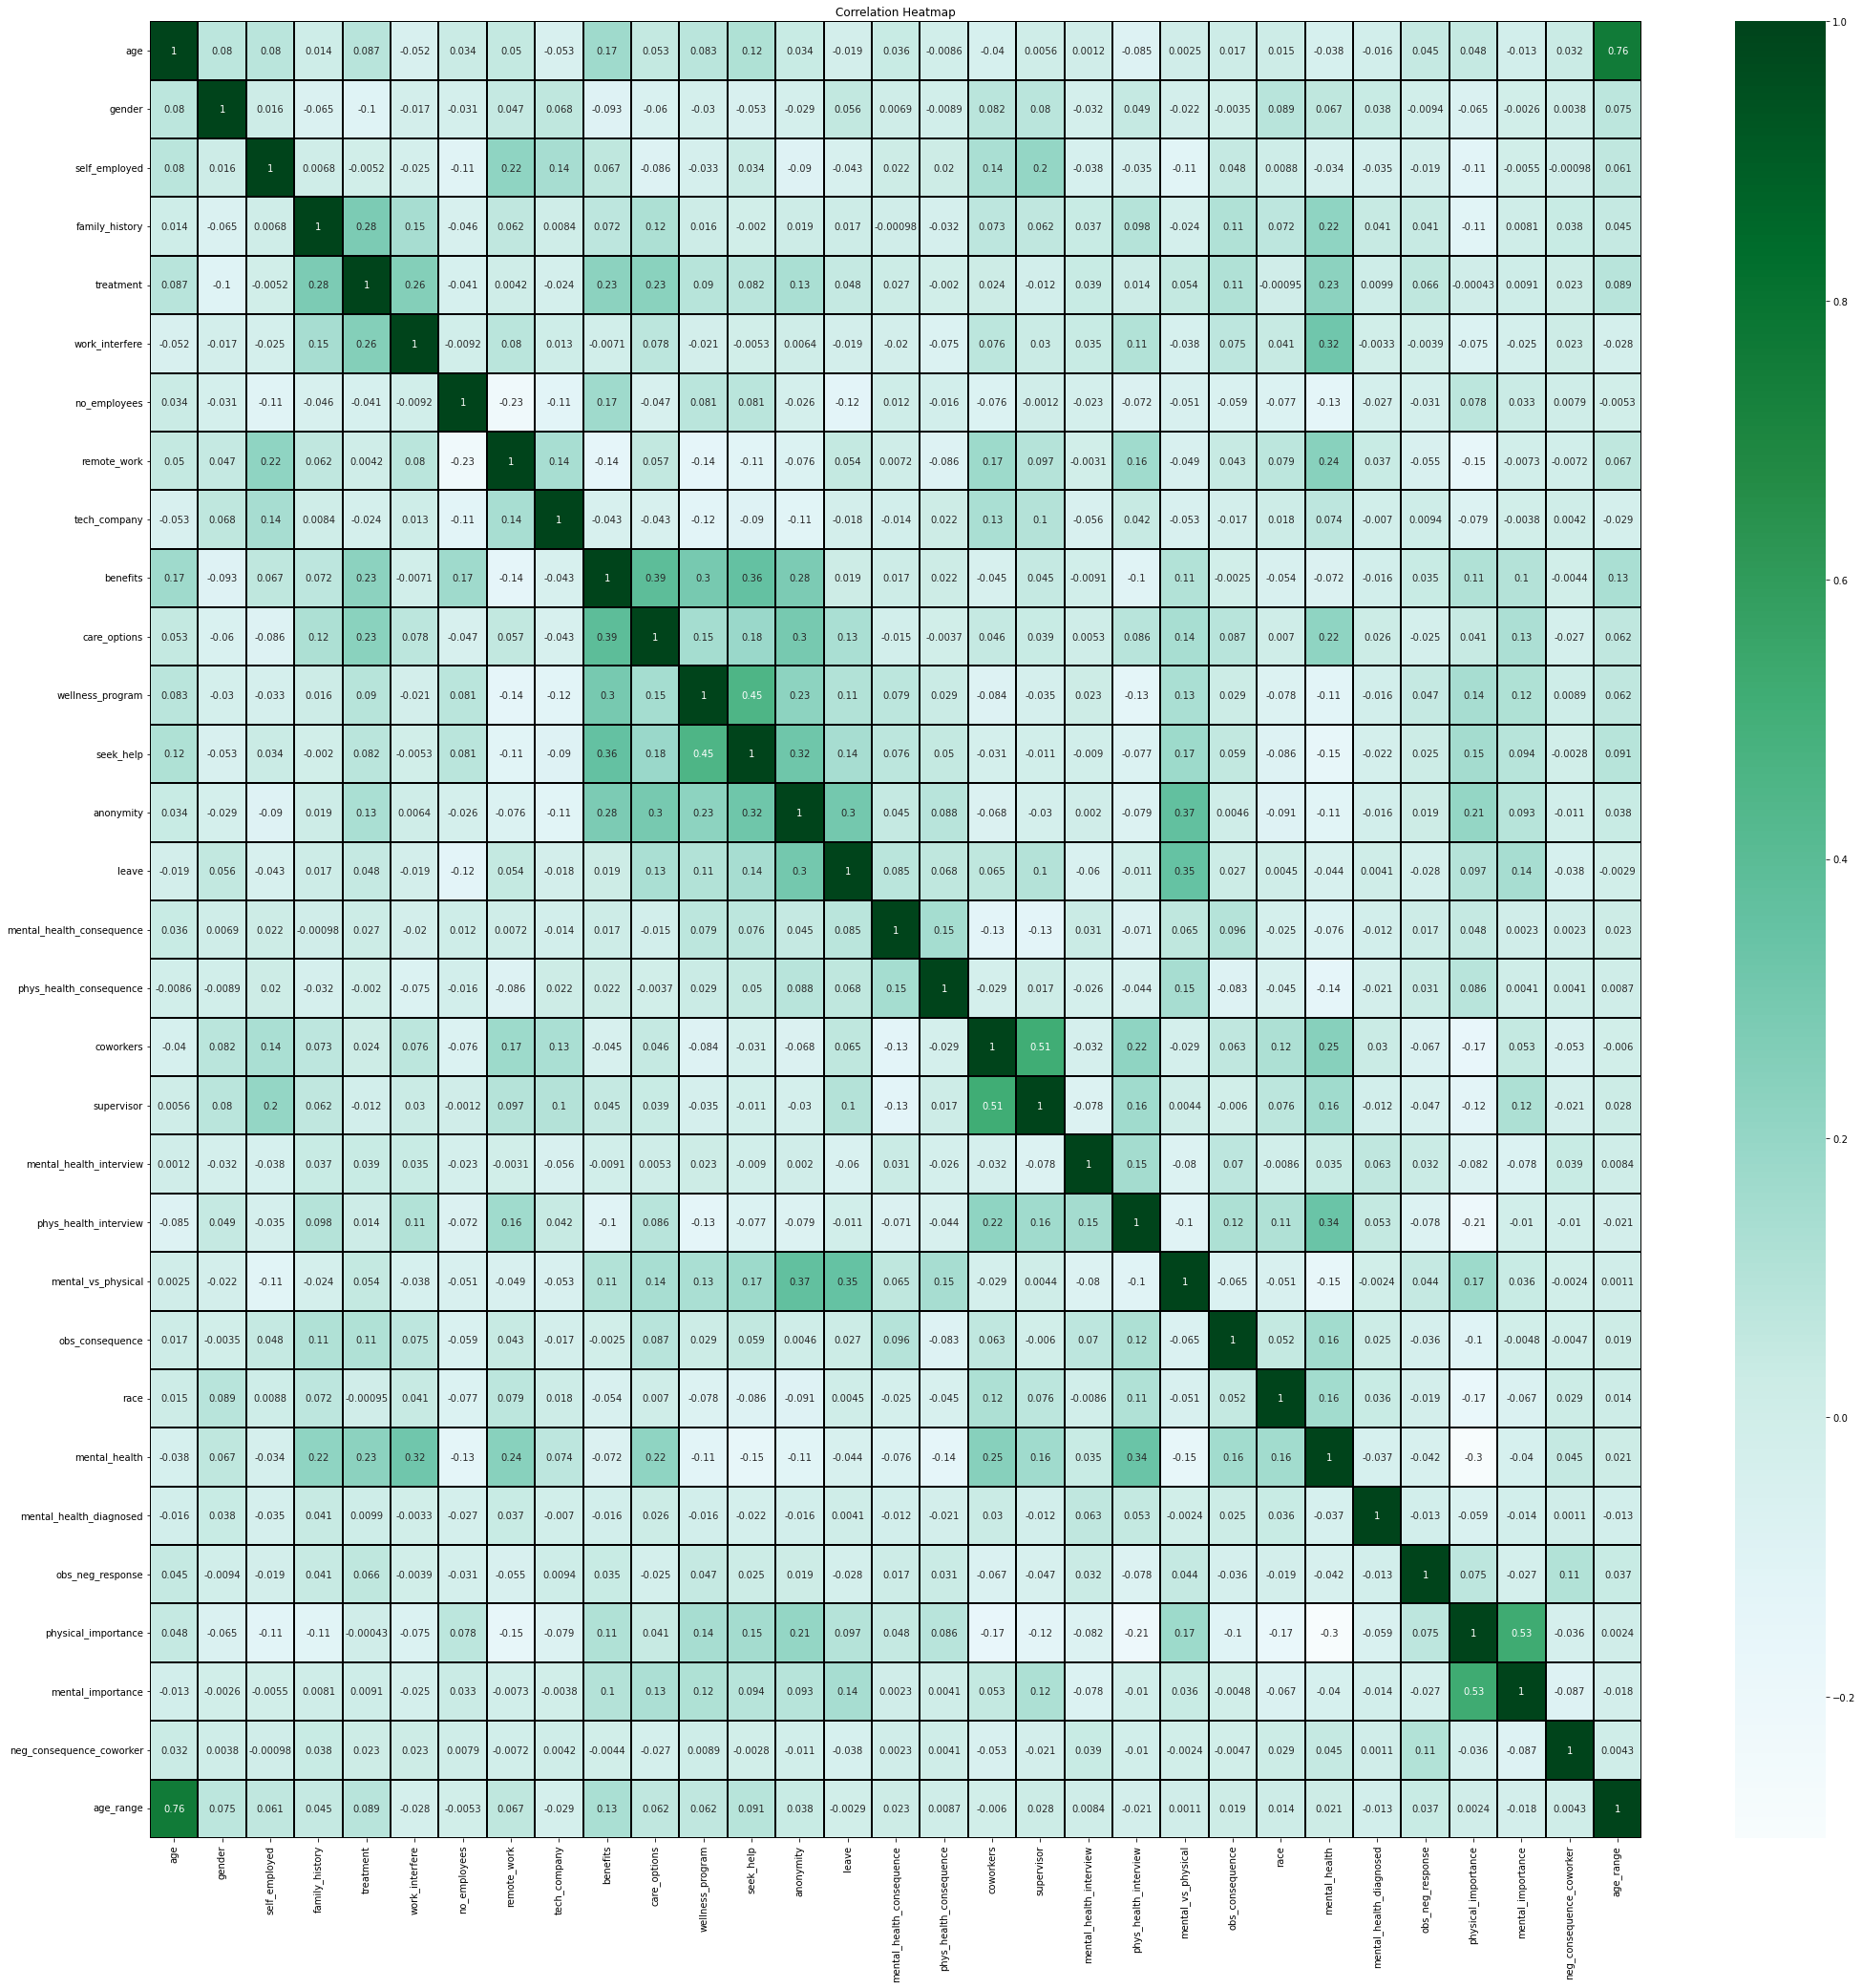

In [24]:
params = {'annot': True, 'fmt': '.2g', 'cmap': 'BuGn',
          'linewidths': 1, 'linecolor': 'black'}

plot_corr_map(data_encoded, **params)

Selected best 8:

* 'age' 
* 'family_history' 
* 'work_interfere' 
* 'benefits'
* 'care_options'
* 'anonymity' 
* 'obs_consequence' 
* 'mental_health'

<a id="Categorical_Quantitative_Insights"></a>
## Categorical Quantitative Insights

In [36]:
def plot_categorical_insight(categorical_columns):

    nrows, ncols = categorical_columns.shape[1], 3
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 88))

    for idx, column in enumerate(categorical_columns):
        ax = axes[idx]
        sns.countplot(data=data,
                      x='mental_health', hue=column, ax=ax[0])

        sns.countplot(data=data, x=column, ax=ax[1])

        sns.boxplot(data=data, x=column,
                    y='age', ax=ax[2])


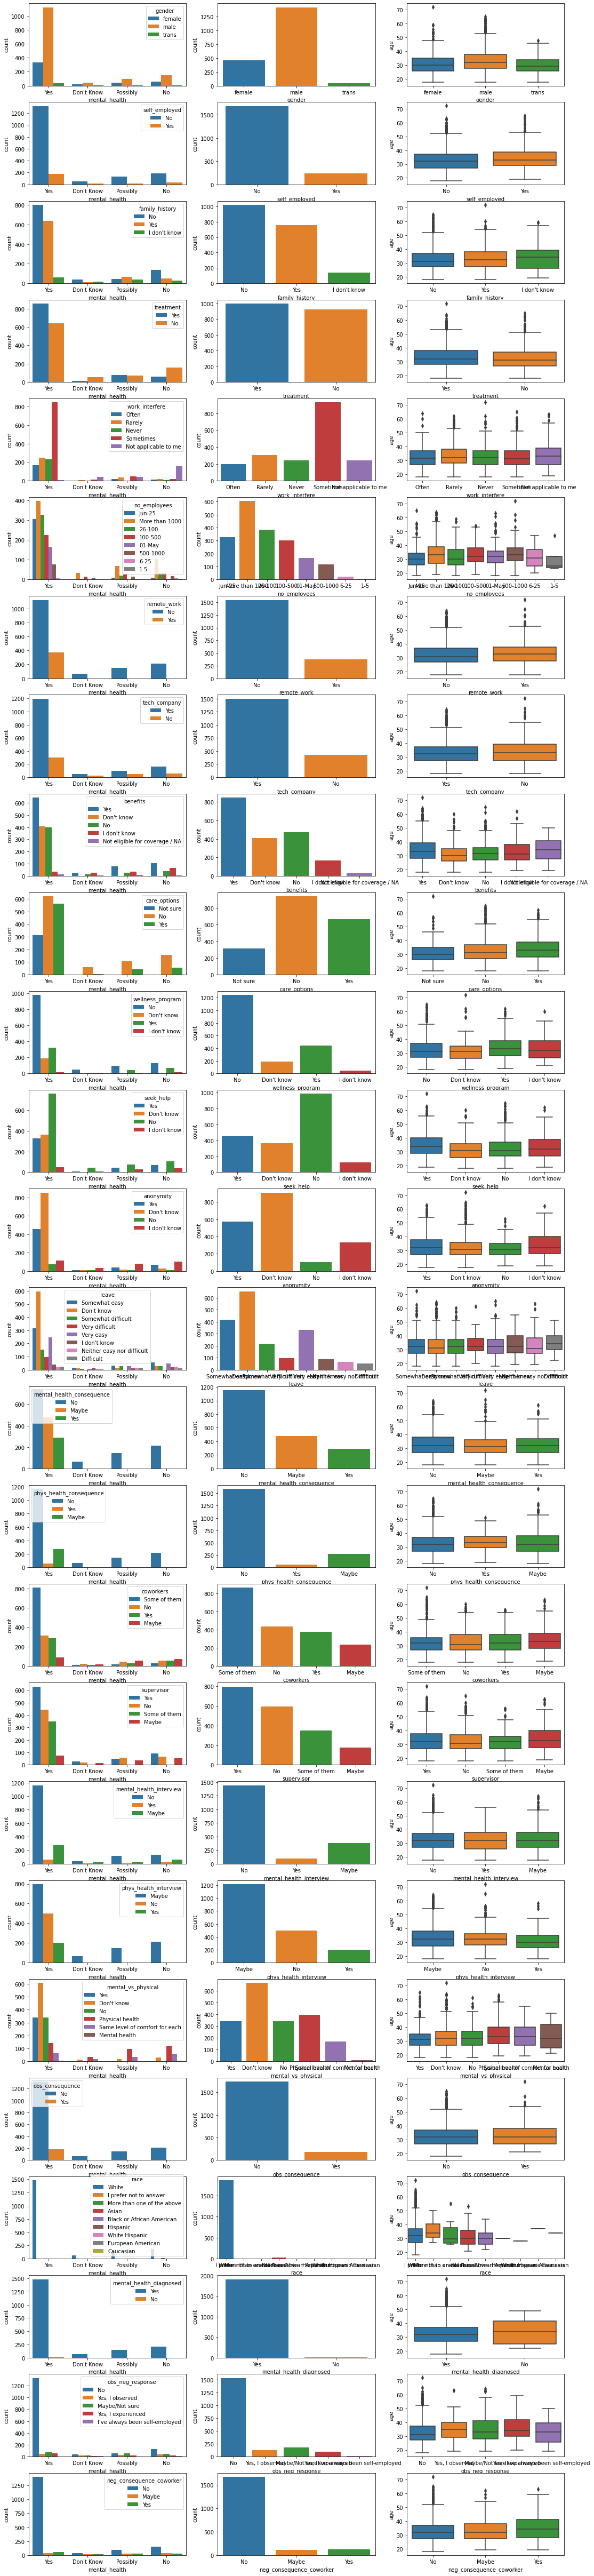

In [37]:
columns = data.select_dtypes(include='object')
columns = columns.drop('mental_health', axis=1)
plot_categorical_insight(columns)


In [27]:
def plot_grades_to_self():
    nrows, ncols = 1, 2
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 8))
    sns.countplot(data=data,
                  x='mental_health', ax=axes[0])

    sns.boxplot(data=data,
                x='mental_health', y='age', ax=axes[1])


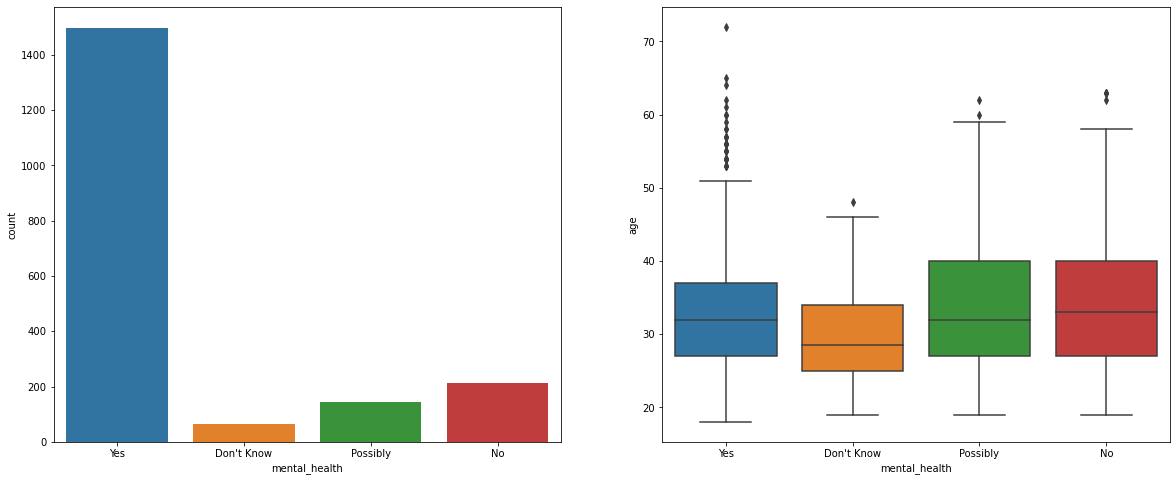

In [28]:
plot_grades_to_self()


## Skewness & Kurtosis

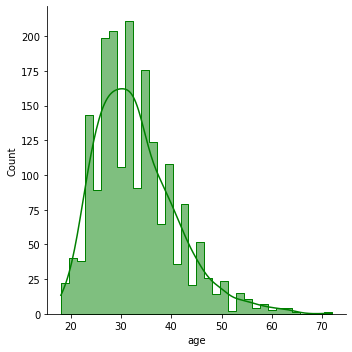

In [29]:
sns.displot(data=data['age'],
            element='step', kde=True, color='green')


In [30]:
print(f"skewness: {data['age'].skew()}")
print(f"kurtosis: {data['age'].kurt()}")

skewness: 0.9336560396667377
kurtosis: 1.1396726387773164
